# Loan Eligibility Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('loan_data_set.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum())
print ("\nUnique values :  \n",df.nunique())
print ("\nData Types :  \n",df.dtypes)

Rows     :  614
Columns  :  13

Features : 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values :   Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Unique values :  
 Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Data Types :  
 Loan_ID               object
Gende

In [5]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [6]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

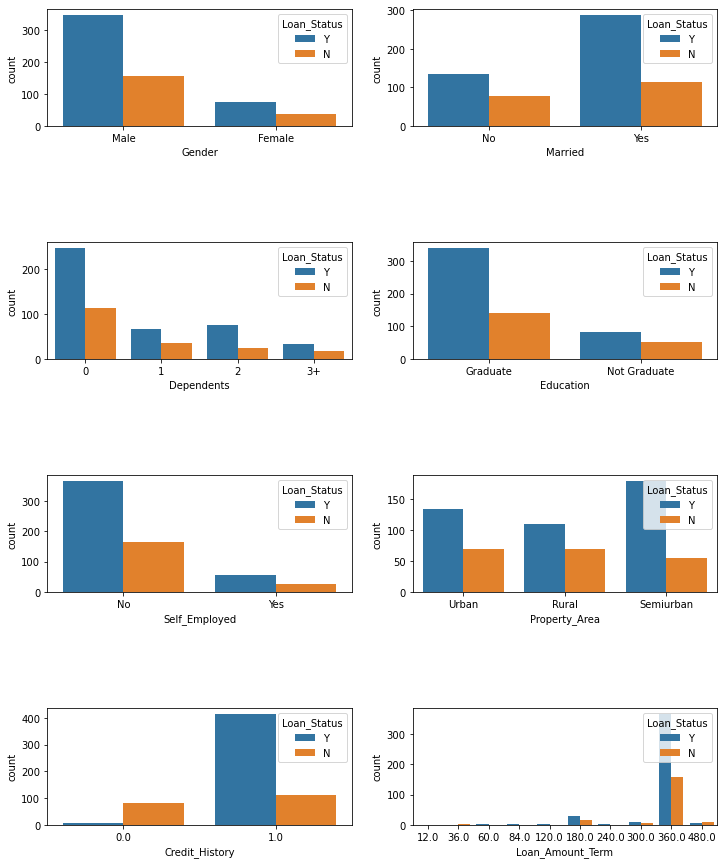

In [9]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [10]:
def show_boxplot_1(list):
    cols = list
    a = 4 # no of rows
    b= 4 # no of columns
    c = 1 # initialize plot counter
    fig = plt.figure(figsize=(30,20))
    for i in cols:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(df[i])
        c = c + 1

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


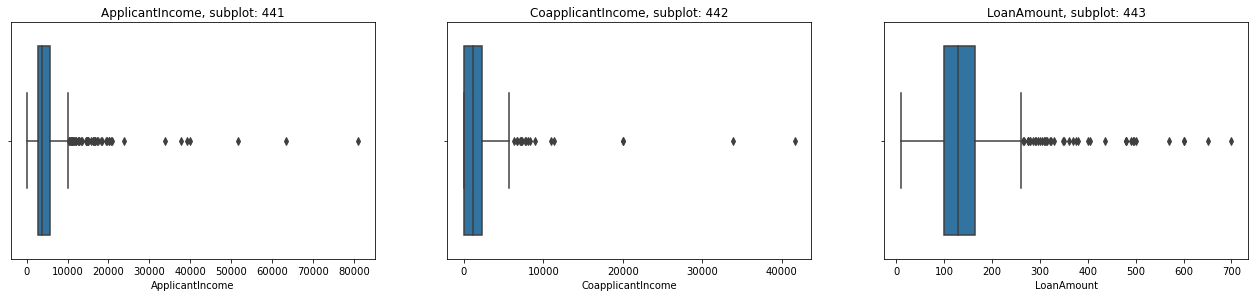

In [11]:
show_boxplot_1(numerical_columns)

In [12]:
dict_IQR = {}
dict_Q1 = {}
dict_Q3 = {}
for i in numerical_columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    dict_Q1[i] = Q1
    dict_Q3[i] = Q3
    dict_IQR[i]=IQR

In [13]:
print(" The Q1 of numerical data is, ",  dict_Q1 ,"\n")
print(" The Q3 of numerical data is, ",  dict_Q3 ,"\n")
print(" The IQR of numerical data is, ",  dict_IQR ,"\n")

 The Q1 of numerical data is,  {'ApplicantIncome': 2877.5, 'CoapplicantIncome': 0.0, 'LoanAmount': 100.25} 

 The Q3 of numerical data is,  {'ApplicantIncome': 5795.0, 'CoapplicantIncome': 2297.25, 'LoanAmount': 164.75} 

 The IQR of numerical data is,  {'ApplicantIncome': 2917.5, 'CoapplicantIncome': 2297.25, 'LoanAmount': 64.5} 



In [14]:
for i in numerical_columns:
    df[i] = np.where(df[i] < (dict_Q1[i] - 1.5* dict_IQR[i]) , (dict_Q1[i] - 1.5* dict_IQR[i]) , df[i])
    df[i] = np.where(df[i] > (dict_Q3[i] + 1.5* dict_IQR[i]) , (dict_Q3[i] + 1.5* dict_IQR[i]) , df[i])

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


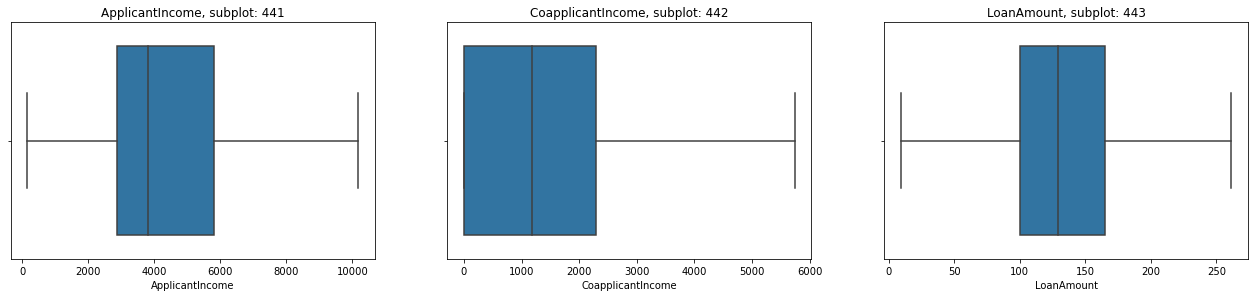

In [15]:
show_boxplot_1(numerical_columns)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [17]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['Married'] = df['Married'].replace(['Yes','No'],[1,0])
df['Self_Employed'] = df['Self_Employed'].replace(['Yes','No'],[1,0])
df['Education'] = df['Education'].replace(['Graduate','Not Graduate'],[1,0])
df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'],[1,0])
df['Property_Area'] = df['Property_Area'].replace(['Rural','Semiurban','Urban'],[1,2,3])
df['Dependents'] = df['Dependents'].replace(['3+'],[3])

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900.0,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106.0,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072.0,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1,1,2,1,0,7583.0,0.0,187.000000,360.0,1.0,3,1


In [19]:
del df['Loan_ID']


In [20]:
df['target']=df['Loan_Status']
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [21]:
Y=df['target'].values

In [22]:
del df['target']

In [23]:
Y=Y.reshape(-1,1)

In [24]:
x = df.values

In [25]:
from sklearn .model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

# Build a Model

##  Naive Bayes

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [27]:
clf = BernoulliNB().fit(x_train, y_train) 
prediction_test = clf.predict(x_test)

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
def classification_report(model):
    prediction_test = model.predict(x_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 


In [29]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : BernoulliNB()

 Model Accuracy:
 1.0

Confusion matrix:
 [[43  0]
 [ 0 80]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [30]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

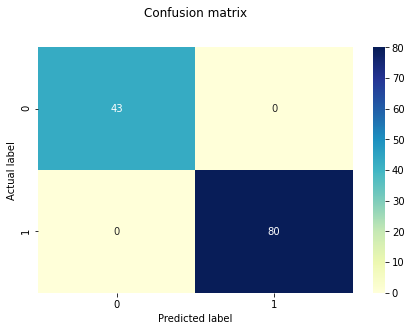

In [31]:
plot_conf_matrix(y_test, prediction_test, class_names)


In [32]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Naive Bayes ROC curve')
    plt.show()

## KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train) 
prediction_test = clf.predict(x_test)

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : KNeighborsClassifier(n_neighbors=9)

 Model Accuracy:
 0.6260162601626016

Confusion matrix:
 [[ 3 40]
 [ 6 74]]

Classification report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.65      0.93      0.76        80

    accuracy                           0.63       123
   macro avg       0.49      0.50      0.44       123
weighted avg       0.54      0.63      0.54       123



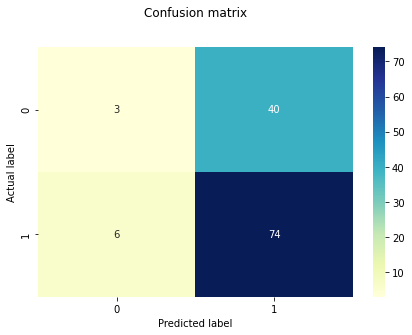

In [35]:
plot_conf_matrix(y_test, prediction_test, class_names)


### ConClusion

On this Data, The Naive Bayes model is working perfectly as compared to KNN Theorem whichhas a very pooraccuracy around 66 Percent